In [1]:
# Import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import warnings

# TF libraries.
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img


warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

2023-11-08 13:59:27.756626: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-08 13:59:27.758477: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-08 13:59:27.794281: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-08 13:59:27.794311: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-08 13:59:27.794337: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

### 1. Data extraction and preparation.

#### 1.1 Check data.  
The ../data/eyes/close/ directory contains 346 .jpg images (400x256), with name format 'closedEye{i}.jpg'  where i is a number 0-345.  
The ../data/eyes/open/ directory contains 480 .jpg images (400x256), with name format 'openEye{i}.jpg' where i is a number 0-479.  


(260, 400)


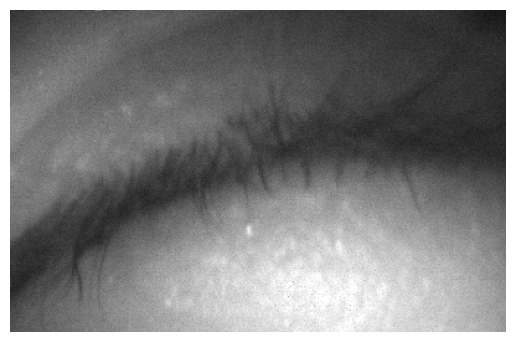

In [2]:
close_path = os.path.join('..','data','eyes','close','closedEye101.jpg')

img = plt.imread(close_path)
img = img/255
print(img.shape)

plt.axis('off')
plt.imshow(img, cmap='gray')

(260, 400)


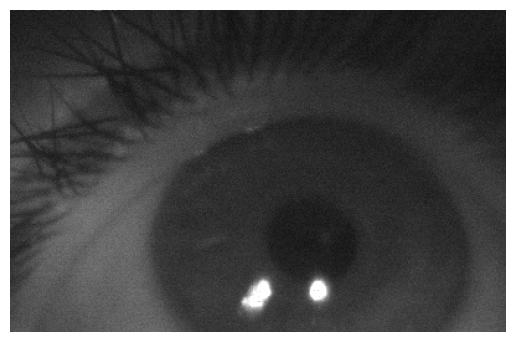

In [3]:
open_path = os.path.join('..','data', 'eyes', 'open','openedEye100.jpg')

img = plt.imread(open_path)
img = img/255
print(img.shape)

plt.axis('off')
plt.imshow(img, cmap='gray')

In [4]:
img.shape

(260, 400)

1.2 Create train and test datasets.

Need to create the train and the test sets. We will import all images in the open_train_path and the open_test_path, transform them to tensors and concatenate as necessary. We will also create a flipped version to augment the data. 

In [5]:
# Get the 2 filepaths.
closed_path = os.path.join('..','data','eyes','close')
open_path = os.path.join('..','data','eyes','open')

In [6]:
img_shape = img.shape
print('Images have a shape of (rows {y}, columns {x}) ', img_shape)

Images have a shape of (rows {y}, columns {x})  (260, 400)


In [7]:
# Get number of all .jpg files in each directory.
open_jpg_files = glob.glob(os.path.join(open_path, '*.jpg'))
num_open_jpg_files = len(open_jpg_files)

closed_jpg_files = glob.glob(os.path.join(closed_path, '*.jpg'))
num_closed_jpg_files = len(closed_jpg_files)

In [8]:
file =  os.path.join(open_path,'openedEye' + str(200) +'.jpg')
img = load_img(file, grayscale=True)
img = img_to_array(img)
img = np.squeeze(img)

flipped_img = np.fliplr(img)

#img = np.squeeze(img)
#flipped_img = np.squeeze(flipped_img)


Treat open*.jpg files.

In [9]:
# Create the X1 array for the open images and X1_rev for the images in reverse.
X1 = np.zeros((num_open_jpg_files, np.prod(img_shape[:])))
X1_rev = np.zeros((num_open_jpg_files, np.prod(img_shape[:])))

for i in (range(X1.shape[0])):
    file =  os.path.join(open_path,'openedEye' + str(i) +'.jpg')
    # print(file)
    # Import image.
    img = load_img(file, grayscale=True)

    # Turn to array and remove dimensions where dim = 1.
    img = img_to_array(img)
    img = np.squeeze(img)

    # Flip image.
    img_rev = np.fliplr(img)

    # Reshape 2D into 1D and scale by 255.
    x = img.reshape(np.prod(img.shape)) / 255
    x_rev = img_rev.reshape(np.prod(img_rev.shape)) /255
    
    # Store into X array where each row is an image and each col a pixel
    X1[i] = x
    X1_rev[i] = x_rev

    
# Create the y array for the open train images
y1 = np.ones((X1.shape[0], ))
y1_rev = np.ones((X1_rev.shape[0]))

Treat closed*.jpg files.

In [10]:
# Create the X3 array for the closed images and X3_rev for the images in reverse.
X3 = np.zeros((num_closed_jpg_files, np.prod(img_shape[:])))
X3_rev = np.zeros((num_closed_jpg_files, np.prod(img_shape[:])))

for i in (range(X3.shape[0])):
    file =  os.path.join(closed_path,'closedEye' + str(i) +'.jpg')
    # print(file)
    # Import image.
    img = load_img(file, grayscale=True)

    # Turn to array and remove dimensions where dim = 1.
    img = img_to_array(img)
    img = np.squeeze(img)

    # Flip image.
    img_rev = np.fliplr(img)

    # Reshape 2D into 1D and scale by 255.
    x = img.reshape(np.prod(img.shape)) / 255
    x_rev = img_rev.reshape(np.prod(img_rev.shape)) /255
    
    # Store into X array where each row is an image and each col a pixel
    X3[i] = x
    X3_rev[i] = x_rev

    
# Create the y array for the open train images
y3 = np.zeros((X3.shape[0], ))
y3_rev = np.zeros((X3_rev.shape[0]))

Verify flipping is conducted successfully.

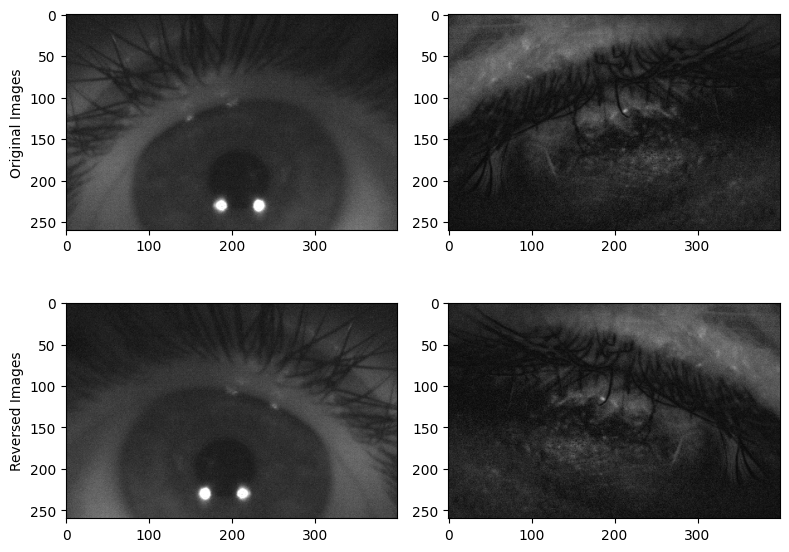

In [11]:
# Check images to ensure operation is successfull.
idx = 70
img1 = X1[idx].reshape(img_shape[0], img_shape[1])
img1_rev = X1_rev[idx].reshape(img_shape[0], img_shape[1])

img3 = X3[idx].reshape(img_shape[0], img_shape[1])
img3_rev = X3_rev[idx].reshape(img_shape[0], img_shape[1])

plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
plt.imshow(img1, cmap = 'gray')
plt.ylabel('Original Images')

plt.subplot(2,2,2)
plt.imshow(img3, cmap = 'gray')

plt.subplot(2,2,3)
plt.imshow(img1_rev, cmap = 'gray')
plt.ylabel('Reversed Images')

plt.subplot(2,2,4)
plt.imshow(img3_rev, cmap = 'gray')

plt.tight_layout()

If the datasets are too large, we can use ImageDataGenerator class in tensorflow. However, the data need to be correctly placed into preset paths.

In [12]:
# # This can be used if the data is large enough 
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# 
# # Define parameters for loading the images
# batch_size = 32
# image_size = (224, 224)  # Adjust the image size as needed
# 
# # Define data directories
# data_dir1 = './src/close/'
# data_dir2_train = './src/open/train/'
# data_dir3_test = './src/open/test'
# 
# # Create image data generators for each directory
# datagen1 = ImageDataGenerator(rescale=1.0/255)  # Rescale pixel values
# datagen2 = ImageDataGenerator(rescale=1.0/255)  # Rescale pixel values
# datagen3 = ImageDataGenerator(rescale=1.0/255)  # Rescale pixel values
# 
# # Create TensorFlow datasets from each directory
# dataset1 = tf.keras.utils.image_dataset_from_directory(
#     data_dir1,
#     image_size=image_size,
#     batch_size=batch_size,
#     validation_split=0.2,  # Optional, for train/validation split
#     subset='training',       # Optional, for train/validation split
#     seed=1337
# )
# 
# dataset2_train = tf.keras.utils.image_dataset_from_directory(
#     data_dir2_train,
#     image_size=image_size,
#     batch_size=batch_size,
#     validation_split=0.2,  # Optional, for train/validation split
#     subset='training',       # Optional, for train/validation split
#     seed=1337
# )
# 
# dataset2_test = tf.keras.utils.image_dataset_from_directory(
#     data_dir2_train,
#     image_size=image_size,
#     batch_size=batch_size,
#     validation_split=0.2,  # Optional, for train/validation split
#     subset='validation',     # Optional, for train/validation split
#     seed=1337
# )
# 
# dataset3 = tf.keras.utils.image_dataset_from_directory(
#     data_dir3_test,
#     image_size=image_size,
#     batch_size=batch_size,
#     seed=1337
# )
# 
# # Combine the datasets into a single dataset
# combined_dataset = dataset1.concatenate(dataset2_train).concatenate(dataset2_test).concatenate(dataset3)
# 
# # You can also use `.shuffle()` and `.prefetch()` for better data loading
# combined_dataset = combined_dataset.shuffle(buffer_size=1000).prefetch(buffer_size=tf.data.AUTOTUNE)
# 

### 2. Open or closed classification.

Create train and test sets. We will add the reversed to improve the results.

In [13]:
# Though the two sets are unbalanced, the level of inbalance is moderate (58% open - 42% closed).
X = np.concatenate([X1, X3])
y = np.concatenate([y1, y3])

In [14]:
# Split into train and test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12)

#### 2.1 Define simple NN model - happy_model.

In [15]:
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
# tf.keras.backend.set_floatx('float16')

def happy_model(input_dim, nb_hid_layers = 5, nb_units = 100, regul = 0, bnorm = False, dropout = 0):
    model = Sequential()

    # Add the first Dense layers of nb_units units with the input dimension
    model.add(Dense(nb_units, input_dim=input_dim, activation='relu', kernel_regularizer=regularizers.l2(regul)))

    # Iterate wrt nb_hid_layers to create similar hidden layers.
    for i in range(nb_hid_layers):
        model.add(Dense(nb_units, activation = 'relu', kernel_regularizer = regularizers.l2(regul)))

        # Add batch normalization.
        if bnorm == True:
            model.add(BatchNormalization())
        
        # Add dropout regularization.
        if dropout > 0:
            model.add(Dropout(dropout))
    
    # Add finally the output layer with one unit: the predicted result
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(regul)))

    return model


In [19]:
X.shape

(826, 104000)

In [21]:
y.shape

(826,)

#### 2.2 Compile and run simple NN model, happy_model.

In [16]:
# Compile.
model1 = happy_model(input_dim = X.shape[1], nb_hid_layers=5, nb_units=200, bnorm = False, dropout = 0)
model1.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

2023-11-08 11:42:52.297837: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-08 11:42:52.298164: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [17]:
# Fit.
from tensorflow.keras.callbacks import EarlyStopping # , TensorBoard

callbacks = [EarlyStopping(monitor='val_loss', patience=20)] # TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)]
history = model1.fit(X_train, y_train, epochs=140, batch_size = 64, validation_data=(X_test, y_test), callbacks = callbacks)

Epoch 1/140
11/11 [==============================] - 2s 115ms/step - loss: 2.4733 - accuracy: 0.5061 - val_loss: 0.6691 - val_accuracy: 0.6627
Epoch 2/140
11/11 [==============================] - 1s 93ms/step - loss: 0.7765 - accuracy: 0.5591 - val_loss: 0.6245 - val_accuracy: 0.7229
Epoch 3/140
11/11 [==============================] - 1s 95ms/step - loss: 0.7183 - accuracy: 0.5439 - val_loss: 0.6686 - val_accuracy: 0.6024
Epoch 4/140
11/11 [==============================] - 1s 94ms/step - loss: 0.7768 - accuracy: 0.5758 - val_loss: 0.5636 - val_accuracy: 0.7349
Epoch 5/140
11/11 [==============================] - 1s 94ms/step - loss: 0.5696 - accuracy: 0.7424 - val_loss: 0.5761 - val_accuracy: 0.7470
Epoch 6/140
11/11 [==============================] - 1s 92ms/step - loss: 0.4654 - accuracy: 0.8015 - val_loss: 0.4927 - val_accuracy: 0.7590
Epoch 7/140
11/11 [==============================] - 1s 90ms/step - loss: 0.3879 - accuracy: 0.8303 - val_loss: 0.5462 - val_accuracy: 0.7711
Epoch

In [18]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

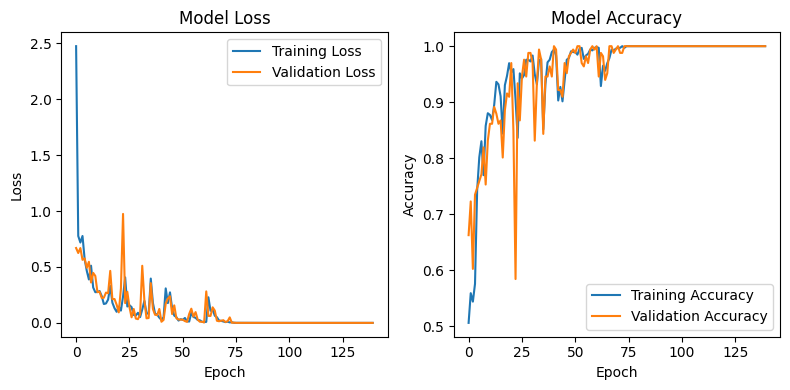

In [19]:
# Plot loss to confirm good hyperparameters.
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1,2,2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()

In [20]:
model1.evaluate(X_train, y_train, verbose = 0)

[1.3592534742201678e-06, 1.0]

In [21]:
model1.evaluate(X_test, y_test, verbose = 0)

[2.2610976884607226e-05, 1.0]

Very good result, 100% training accuracy, 100% test accuracy. It is noteworthy that to obtain these results no batch normalization or regularization (even dropout) were necessary. We can store this trained model and use it for classification (eye open-closed) purposes.

In [22]:
model_path = os.path.join('..','models','open-closed-classifier.h5')
model1.save(model_path)